# Multiple Linear Regression To Determine Factors of Importance & their Extent of Impact on Price of Used Cars 

Our objective is to identiy most significant variables that impact the price of a used car. Goal is to find out 


    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a used car
   
To help us with our descriptive goals of undersanding the signifiance of features and eliminate those dont meet the level of signifiance we will be using statsmodel.api and performing 

    1. RFE ( Recursive feature elimination)
    2. VIF ( Variance Influence Factor)
    3. Some Feature Engineering




## Step 1 : Reading and Understanding the Data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('1.04.+Real-life+example.csv')

In [3]:
df.sample(12)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
506,Audi,"21,900.00",crossover,183,4.20,Petrol,yes,2007,Q7
307,Mitsubishi,"6,200.00",sedan,152,1.60,Petrol,yes,2006,Lancer
1679,Audi,"15,000.00",hatch,66,1.20,Petrol,yes,2011,A1
2079,BMW,"39,600.00",crossover,98,3.00,Petrol,yes,2011,X6
580,Toyota,"43,999.00",other,0,2.80,Diesel,yes,2016,Hilux
651,Mercedes-Benz,"69,999.00",crossover,0,2.20,Diesel,yes,2016,GLE-Class
3840,Volkswagen,"30,900.00",sedan,30,2.00,Diesel,yes,2014,Passat B7
578,Volkswagen,"11,200.00",crossover,1,4.20,Petrol,yes,2004,Touareg
1724,Mitsubishi,"33,000.00",other,0,2.40,Diesel,yes,2016,L 200
62,BMW,"133,000.00",crossover,7,4.40,Petrol,yes,2015,X5 M


In [4]:
df.shape

(4345, 9)

In [5]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
df_copy = df.copy()

## Step 2: Cleaning the Data

#### Drop Missing Rows

In [7]:
df.dropna(axis = 0, inplace = True)

In [8]:
df.shape

(4025, 9)

In [9]:
#Create a Copy of the Data

df_drop = df

## Step 3: Data Visualization

#### Car By Brand Name

In [10]:
df_drop['Brand'].value_counts()

Volkswagen       880
Mercedes-Benz    823
BMW              640
Toyota           510
Renault          445
Audi             420
Mitsubishi       307
Name: Brand, dtype: int64

Text(0, 0.5, 'Count of Cars')

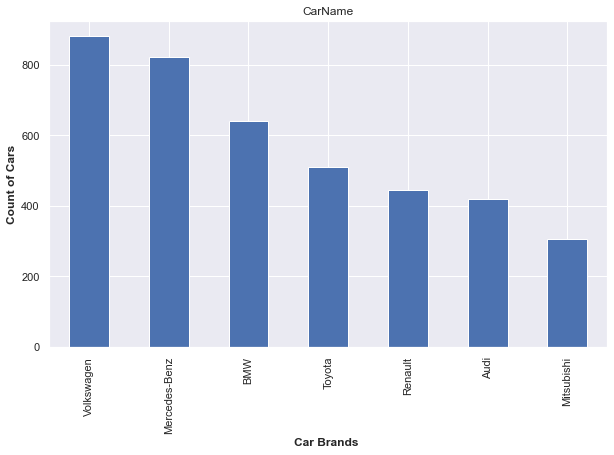

In [11]:
sns.set()
plt.rcParams['figure.figsize'] = [10,6]
ax=df_drop['Brand'].value_counts().plot(kind='bar',stacked=True)
ax.title.set_text('CarName')
plt.xlabel("Car Brands ",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')


#### Understanding Price

In [12]:
df_drop['Price'].describe()

count     4,025.00
mean     19,552.31
std      25,815.73
min         600.00
25%       6,999.00
50%      11,500.00
75%      21,900.00
max     300,000.00
Name: Price, dtype: float64

In [13]:
df_drop.groupby('Engine Type')['Price'].mean() 

Engine Type
Diesel   20,361.03
Gas      12,314.56
Other    14,103.35
Petrol   21,829.44
Name: Price, dtype: float64

Text(0.5, 0, 'Continuous Variable')

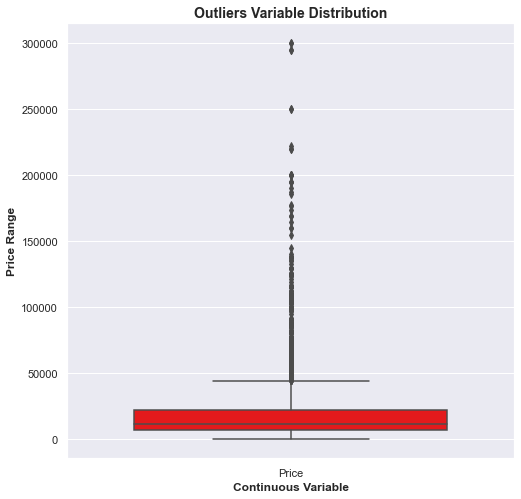

In [14]:
outliers = ['Price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df_drop[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')

<Figure size 1440x432 with 0 Axes>

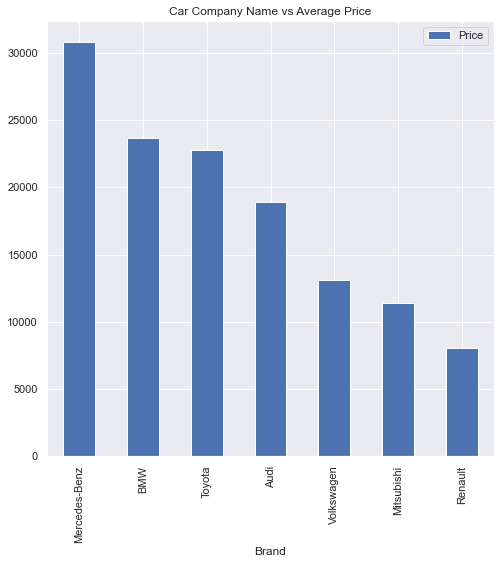

In [15]:
plt.figure(figsize=(20, 6))
df_drop.groupby('Brand')['Price'].mean()
df_autox = pd.DataFrame(df_drop.groupby('Brand')['Price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

<Figure size 1440x432 with 0 Axes>

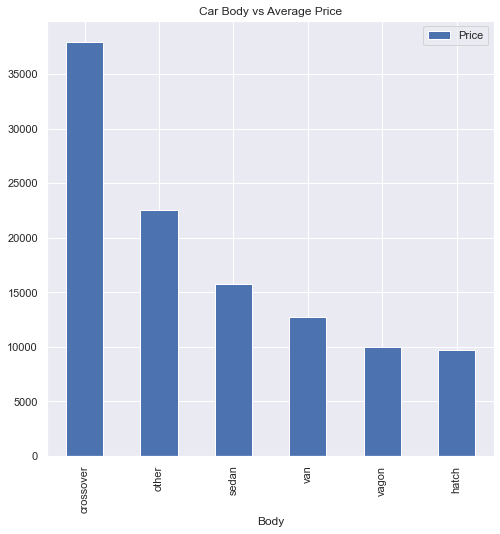

In [16]:
plt.figure(figsize=(20, 6))
df_autox = pd.DataFrame(df_drop.groupby('Body')['Price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Body vs Average Price')
plt.show()

In [17]:
#Price by Body Type ( Crossovers are more expensive)

agg_func_math = {
    'Price':
    ['mean','min', 'max','count','size']
}

brand_body = df_drop.groupby(['Brand','Body']).agg(agg_func_math).round(2)
pd.DataFrame(brand_body).style.background_gradient(cmap='Blues')

## Step 4: Dealing with Outliers 

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

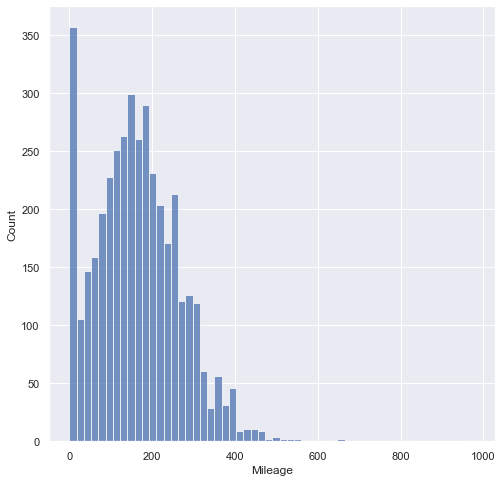

In [18]:
sns.histplot(df_drop['Mileage'])

In [19]:
#Trim top .1% values of Mileage and drop them

q = df_drop['Mileage'].quantile(0.99)
df_drop1 = df_drop[df_drop['Mileage']<q]

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

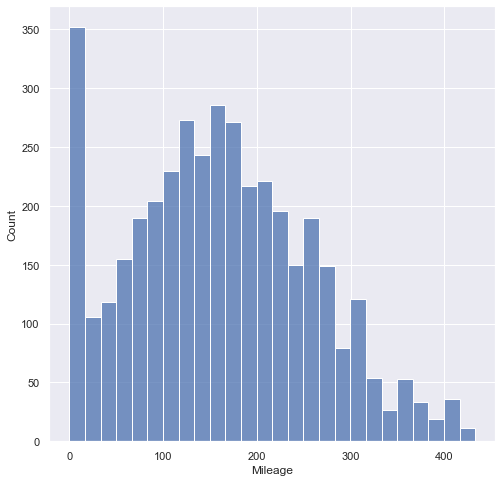

In [20]:
sns.histplot(df_drop1['Mileage'])

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

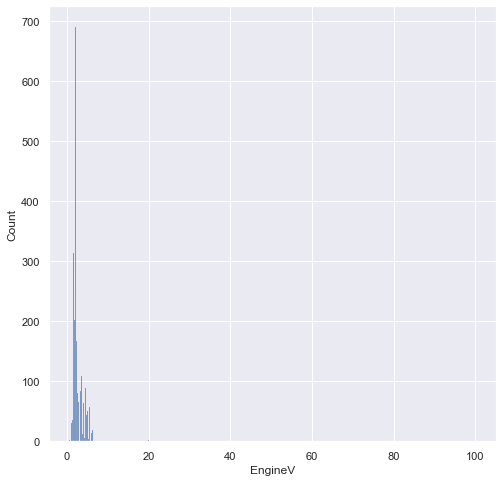

In [21]:
# Modern Cars dont have Engine volume > 6.5. Histogram shows that we have to deal with erroneous data

sns.histplot(df_drop['EngineV'])

In [22]:
#Drop All EngineV greater than 6.5

df_drop2 = df_drop1[df_drop1['EngineV']<6.5]

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

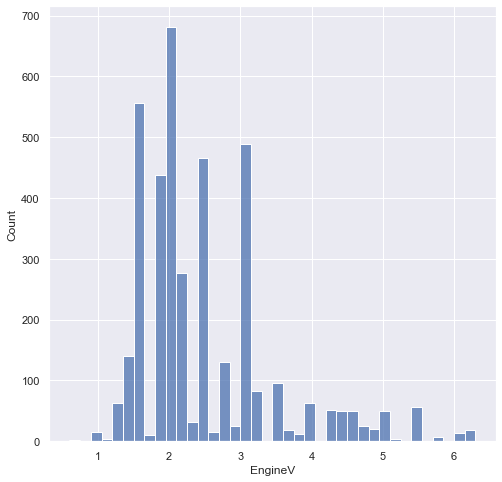

In [23]:
sns.histplot(df_drop2['EngineV'])

<AxesSubplot:xlabel='Year', ylabel='Count'>

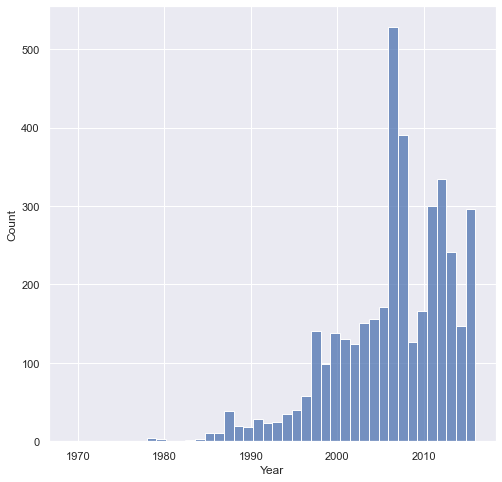

In [24]:
#Drop All Years earlier than 1990
sns.histplot(df_drop2['Year'])

In [25]:
#There are very few cars between 1970 and 1980, and they can be dropped to get a distribution that is closer to normal
q1 = df_drop2['Year'].quantile(0.01)
df_drop3 = df_drop2[df_drop2['Year']>q1]

<AxesSubplot:xlabel='Year', ylabel='Count'>

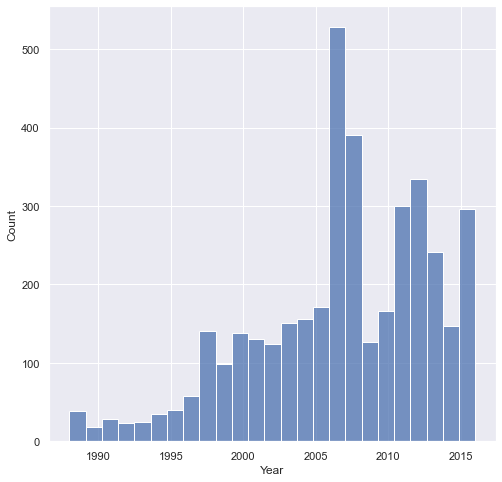

In [26]:
sns.histplot(df_drop3['Year'])

In [27]:
#After trimming and cleaning we rest dataframe index
df_clean = df_drop3.reset_index(drop = True)

In [28]:
df_clean.shape

(3907, 9)

In [29]:
df_clean['Price'] = df_clean['Price'].astype('int')
df_clean_copy = df_clean.copy()

## Step 5: Some Feature Engineering

Before our data can be used for modeling all text values have to be converted into numerical values. Variable 'Model' which has more than 250+ Car models will require feature engineering, we are going to bin the various models into three categories 
1. Budget_Friendly
2. Medium_Range
3. High_End categories

In [30]:
# Lets Check on the number of models we have. 

for x in df_clean.columns:
    print(x, len(df_clean[x].unique()))

Brand 7
Price 877
Body 6
Mileage 376
EngineV 57
Engine Type 4
Registration 2
Year 29
Model 295


We have 295 Car Models

In [31]:
# First we calculate mean of each model and then merge the t column that contains the mean back to our Dataframe

t = df_clean_copy.groupby(['Model'])['Price'].mean()
df_clean_copy = df_clean_copy.merge(t.reset_index(), how='left',on='Model')

In [32]:
#Price_y contains mean price by car model

df_clean_copy.head()

,Brand,Price_x,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Price_y
0,BMW,4200,sedan,277,2.00,Petrol,yes,1991,320,"10,345.05"
1,Mercedes-Benz,7900,van,427,2.90,Diesel,yes,1999,Sprinter 212,"10,300.00"
2,Mercedes-Benz,13300,sedan,358,5.00,Gas,yes,2003,S 500,"50,568.15"
3,Audi,23000,crossover,240,4.20,Petrol,yes,2007,Q7,"38,904.14"
4,Toyota,18300,crossover,120,2.00,Petrol,yes,2011,Rav 4,"18,171.16"


In [33]:
#Allocate 3 Bins
bins = [0,20000,100000,300000]
label =['Budget_Friendly','Medium_Range','High_End']

In [34]:
# We Bin Car Models into 3 Category based on their mean price
df_clean['Cars_Category'] = pd.cut(df_clean_copy['Price_y'],bins,right=False,labels=label)

In [35]:
df_clean.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Cars_Category
0,BMW,4200,sedan,277,2.00,Petrol,yes,1991,320,Budget_Friendly
1,Mercedes-Benz,7900,van,427,2.90,Diesel,yes,1999,Sprinter 212,Budget_Friendly
2,Mercedes-Benz,13300,sedan,358,5.00,Gas,yes,2003,S 500,Medium_Range
3,Audi,23000,crossover,240,4.20,Petrol,yes,2007,Q7,Medium_Range
4,Toyota,18300,crossover,120,2.00,Petrol,yes,2011,Rav 4,Budget_Friendly


In [36]:
df_clean_copy = df_clean

In [37]:
# We Drop Model Column since we have captured that in Cars_Category
df_cleaned = df_clean.drop('Model', axis=1)

In [38]:
df_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Cars_Category
0,BMW,4200,sedan,277,2.00,Petrol,yes,1991,Budget_Friendly
1,Mercedes-Benz,7900,van,427,2.90,Diesel,yes,1999,Budget_Friendly
2,Mercedes-Benz,13300,sedan,358,5.00,Gas,yes,2003,Medium_Range
3,Audi,23000,crossover,240,4.20,Petrol,yes,2007,Medium_Range
4,Toyota,18300,crossover,120,2.00,Petrol,yes,2011,Budget_Friendly


<AxesSubplot:xlabel='Price', ylabel='Count'>

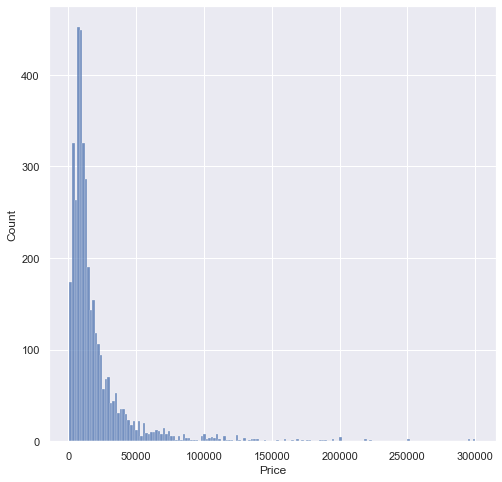

In [39]:
# To relax OLS assumption we need to check how price is distributed. 
# It appears that price is skewed to the right and we will have to deal with it before using it in model
sns.histplot(df_clean['Price'])


In [40]:
# Log Transformation seems like a good strategy to get it close to normal distribution
log_price = np.log(df_cleaned['Price'])
df_cleaned['log_price'] = log_price
df_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Cars_Category,log_price
0,BMW,4200,sedan,277,2.00,Petrol,yes,1991,Budget_Friendly,8.34
1,Mercedes-Benz,7900,van,427,2.90,Diesel,yes,1999,Budget_Friendly,8.97
2,Mercedes-Benz,13300,sedan,358,5.00,Gas,yes,2003,Medium_Range,9.50
3,Audi,23000,crossover,240,4.20,Petrol,yes,2007,Medium_Range,10.04
4,Toyota,18300,crossover,120,2.00,Petrol,yes,2011,Budget_Friendly,9.81


<AxesSubplot:xlabel='log_price', ylabel='Count'>

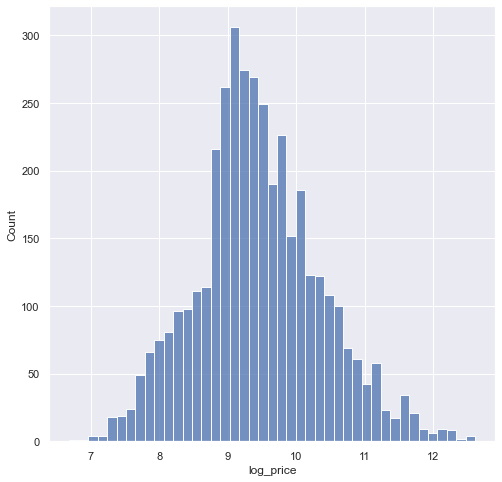

In [41]:
# Check Price histogram after Log Transformation
sns.histplot(df_cleaned['log_price'])

## Step 6: Relax OLS assumption 
Check if Mileage, EngineV and Year have a linear relationship with log_price

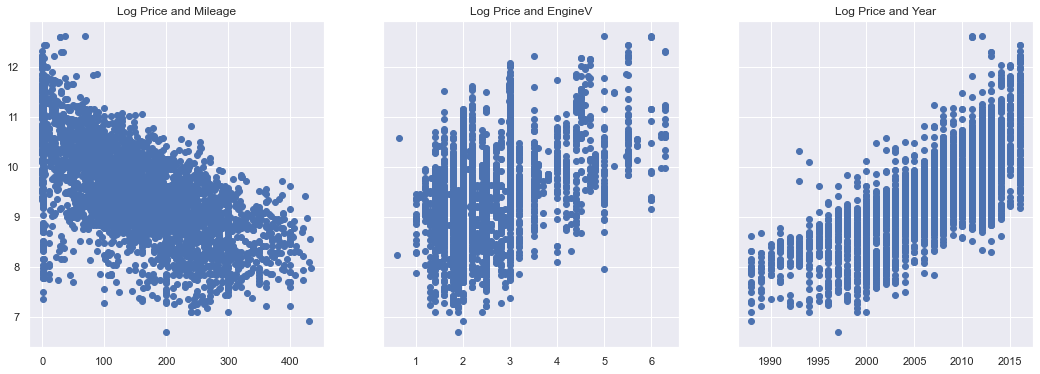

In [42]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(18,6))
ax1.scatter(df_cleaned['Mileage'],df_cleaned['log_price'])
ax1.set_title('Log Price and Mileage')
ax2.scatter(df_cleaned['EngineV'],df_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(df_cleaned['Year'],df_cleaned['log_price'])
ax3.set_title('Log Price and Year')


plt.show()

In [43]:
df_cleaned.drop('Price', axis = 1, inplace = True)

In [44]:
df_cleaned.sample(5)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Cars_Category,log_price
2361,Toyota,sedan,145,2.40,Petrol,yes,2007,Budget_Friendly,9.37
2867,Volkswagen,sedan,180,3.00,Diesel,yes,2007,Medium_Range,9.79
1544,Mercedes-Benz,crossover,200,4.00,Diesel,yes,2007,Medium_Range,10.15
2639,Mercedes-Benz,sedan,89,6.30,Petrol,yes,2008,Medium_Range,10.33
1851,Toyota,crossover,51,3.00,Diesel,yes,2013,Medium_Range,10.67


In [45]:
#Significant Columns that we are going to use for modelling 
sig_cols = ['Brand','Body','Mileage','EngineV','Engine Type','Registration','Year','Cars_Category','log_price']

In [46]:
df_cleaned[sig_cols]

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Cars_Category,log_price
0,BMW,sedan,277,2.00,Petrol,yes,1991,Budget_Friendly,8.34
1,Mercedes-Benz,van,427,2.90,Diesel,yes,1999,Budget_Friendly,8.97
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,2003,Medium_Range,9.50
3,Audi,crossover,240,4.20,Petrol,yes,2007,Medium_Range,10.04
4,Toyota,crossover,120,2.00,Petrol,yes,2011,Budget_Friendly,9.81
...,...,...,...,...,...,...,...,...,...
3902,Volkswagen,van,163,2.50,Diesel,yes,2008,Budget_Friendly,9.35
3903,Toyota,sedan,35,1.60,Petrol,yes,2014,Budget_Friendly,9.79
3904,Mercedes-Benz,sedan,9,3.00,Diesel,yes,2014,Medium_Range,11.74
3905,BMW,sedan,1,3.50,Petrol,yes,1999,Medium_Range,8.78


In [47]:
df_cleaned.shape

(3907, 9)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [49]:
df_auto = df_cleaned

In [50]:
#Separate Category columns from Numerical columns for additional processing
sig_cat_cols = ['Brand','Body','Engine Type','Registration','Cars_Category']

In [51]:
#Convert Categorical values to numerical
dummies = pd.get_dummies(df_auto[sig_cat_cols])
dummies.shape

(3907, 22)

In [52]:
dummies = pd.get_dummies(df_auto[sig_cat_cols], drop_first = True)
dummies.shape

(3907, 17)

In [53]:
df_auto = pd.concat([df_auto, dummies], axis = 1)

In [54]:
df_auto.drop( sig_cat_cols, axis = 1, inplace = True)
df_auto.shape

(3907, 21)

In [55]:
df_auto.sample(5)

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Cars_Category_Medium_Range,Cars_Category_High_End
3271,85,1.80,2007,9.35,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
585,112,2.00,2011,9.38,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2631,72,2.40,2006,9.35,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3370,368,3.00,2000,9.01,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2242,175,2.00,2001,9.02,0,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [56]:
np.random.seed(0)
df_train, df_test = train_test_split(df_auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [57]:
df_train.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Cars_Category_Medium_Range,Cars_Category_High_End
1530,182,2.00,2011,9.42,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3570,200,1.40,2007,8.52,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2411,107,1.60,2010,9.13,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
531,241,2.00,1998,9.01,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1761,245,2.20,2002,8.90,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## Step 7: Rescaling the Features

In [58]:
scaler = preprocessing.StandardScaler()

In [59]:
sig_num_col = ['Mileage','EngineV','Year','log_price']


In [60]:
import warnings
warnings.filterwarnings("ignore")

df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])


In [61]:
df_train.sample(5)

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Cars_Category_Medium_Range,Cars_Category_High_End
1404,-0.49,2.00,0.19,0.97,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
148,-0.18,-0.99,0.84,-0.66,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2413,-1.43,-0.99,1.49,0.36,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2466,-0.04,-0.48,0.52,-0.33,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2374,-1.09,3.95,1.00,1.93,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,1,0


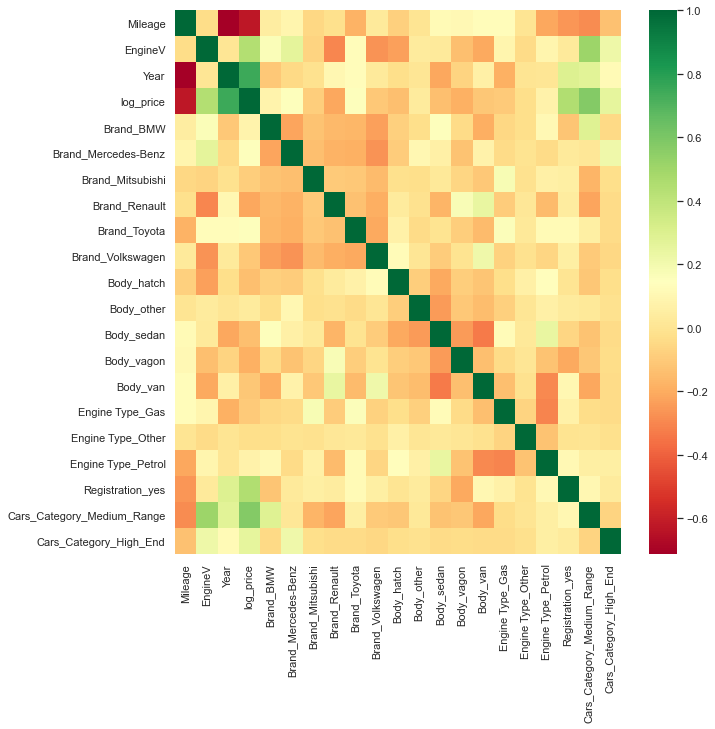

In [62]:
#After Rescaling we check how features are correlated to log_price
plt.figure(figsize = (10, 10))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

## Step 8: Divide X and Y sets for the model building

In [63]:
y_train = df_train.pop('log_price')
X_train = df_train

## Step 9: Building a Linear Model


#### We start with "Mileage" to understand how significant an impact it has on the value of a car in our model

In [64]:
X_train_1 = X_train['Mileage']


In [65]:
#add constant
X_train_1c = sm.add_constant(X_train_1)

#create a model 

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [66]:
# Check parameters created

lr_1.params

const      0.00
Mileage   -0.63
dtype: float64

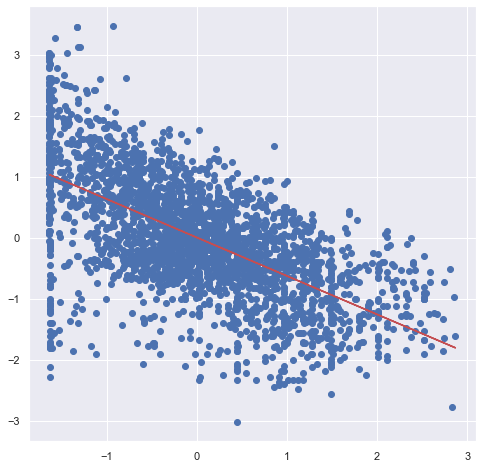

In [67]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], -0.63*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [68]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     1766.
Date:                Sat, 07 May 2022   Prob (F-statistic):          3.90e-298
Time:                        22:42:30   Log-Likelihood:                -3197.8
No. Observations:                2734   AIC:                             6400.
Df Residuals:                    2732   BIC:                             6411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.927e-16      0.015    3.3e-14      1.0

Mileage explains about 39% of the variability in our model. Mileage is negatively correlated with price of vehicle

#### We Add Another Variable - Engine

In [69]:
X_train_2 = X_train[['Mileage', 'EngineV']]

In [70]:
#add constant
X_train_2c = sm.add_constant(X_train_2)

#create a model 

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [71]:
lr_2.params

const      0.00
Mileage   -0.61
EngineV    0.42
dtype: float64

In [72]:
#Print a summary of the linear regression model obtained
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     1821.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        22:42:30   Log-Likelihood:                -2720.8
No. Observations:                2734   AIC:                             5448.
Df Residuals:                    2731   BIC:                             5465.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.927e-16      0.013   3.93e-14      1.0

Adding Engine further improves model explainibility, accounting for 58% of the variability in Car prices

#### We Add Another Variable - Year

In [101]:
X_train_3 = X_train[['Mileage','EngineV','Year']]

In [102]:
#add constant
X_train_3c = sm.add_constant(X_train_3)

#create a model 

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [75]:
#Print a summary of the linear regression model obtained
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     2925.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        22:42:30   Log-Likelihood:                -1912.8
No. Observations:                2734   AIC:                             3834.
Df Residuals:                    2730   BIC:                             3857.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.927e-16      0.009   5.28e-14      1.0

In [76]:
lr_3.params

const      0.00
Mileage   -0.17
EngineV    0.43
Year       0.62
dtype: float64

With Mileage, EngineV, and Year Variables our Model accounts for 76% of the price variability

### Step 10: Add all the remaining features & use Recursive Feature Elimination (RFE) to see if they improve model explainibility 
### RFE 

In [77]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 19)             
rfe = rfe.fit(X_train, y_train)

In [78]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Mileage', True, 1),
 ('EngineV', True, 1),
 ('Year', True, 1),
 ('Brand_BMW', False, 2),
 ('Brand_Mercedes-Benz', True, 1),
 ('Brand_Mitsubishi', True, 1),
 ('Brand_Renault', True, 1),
 ('Brand_Toyota', True, 1),
 ('Brand_Volkswagen', True, 1),
 ('Body_hatch', True, 1),
 ('Body_other', True, 1),
 ('Body_sedan', True, 1),
 ('Body_vagon', True, 1),
 ('Body_van', True, 1),
 ('Engine Type_Gas', True, 1),
 ('Engine Type_Other', True, 1),
 ('Engine Type_Petrol', True, 1),
 ('Registration_yes', True, 1),
 ('Cars_Category_Medium_Range', True, 1),
 ('Cars_Category_High_End', True, 1)]

In [79]:
col_sup = X_train.columns[rfe.support_]
col_sup

Index(['Mileage', 'EngineV', 'Year', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi',
       'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Cars_Category_Medium_Range', 'Cars_Category_High_End'],
      dtype='object')

In [80]:
X_train_rfe = X_train[col_sup]

In [81]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1216.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        22:42:30   Log-Likelihood:                -800.28
No. Observations:                2734   AIC:                             1641.
Df Residuals:                    2714   BIC:                             1759.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
16,Registration_yes,8.99
10,Body_sedan,2.99
15,Engine Type_Petrol,2.59
12,Body_van,2.50
0,Mileage,2.44
2,Year,2.44
17,Cars_Category_Medium_Range,2.42
7,Brand_Volkswagen,2.24
3,Brand_Mercedes-Benz,1.99
1,EngineV,1.95


In [83]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe1 = X_train_rfe.drop('Brand_Mercedes-Benz', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1283.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        22:42:30   Log-Likelihood:                -801.33
No. Observations:                2734   AIC:                             1641.
Df Residuals:                    2715   BIC:                             1753.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
16,Cars_Category_Medium_Range,8.99
10,Body_vagon,2.99
15,Registration_yes,2.59
12,Engine Type_Gas,2.50
0,Mileage,2.44
2,Year,2.44
17,Cars_Category_High_End,2.42
7,Body_hatch,2.24
3,Brand_Mitsubishi,1.99
1,EngineV,1.95


In [85]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe2 = X_train_rfe1.drop('Cars_Category_Medium_Range', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1204.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        22:42:31   Log-Likelihood:                -948.45
No. Observations:                2734   AIC:                             1933.
Df Residuals:                    2716   BIC:                             2039.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [86]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe3 = X_train_rfe2.drop('Engine Type_Other', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1277.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        22:42:31   Log-Likelihood:                -950.33
No. Observations:                2734   AIC:                             1935.
Df Residuals:                    2717   BIC:                             2035.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
10,Body_vagon,2.99
15,Cars_Category_High_End,2.59
12,Engine Type_Gas,2.50
0,Mileage,2.44
2,Year,2.44
7,Body_hatch,2.24
3,Brand_Mitsubishi,1.99
1,EngineV,1.95
5,Brand_Toyota,1.90
13,Engine Type_Petrol,1.72


In [88]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe4 = X_train_rfe3.drop('Body_sedan', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1263.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        22:42:31   Log-Likelihood:                -1041.8
No. Observations:                2734   AIC:                             2116.
Df Residuals:                    2718   BIC:                             2210.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
10,Body_van,2.99
12,Engine Type_Petrol,2.50
0,Mileage,2.44
2,Year,2.44
7,Body_hatch,2.24
3,Brand_Mitsubishi,1.99
1,EngineV,1.95
5,Brand_Toyota,1.90
13,Registration_yes,1.72
6,Brand_Volkswagen,1.67


In [90]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe5 = X_train_rfe4.drop('Body_other', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1352.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        22:42:31   Log-Likelihood:                -1043.6
No. Observations:                2734   AIC:                             2117.
Df Residuals:                    2719   BIC:                             2206.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
10,Engine Type_Gas,2.99
12,Registration_yes,2.50
0,Mileage,2.44
2,Year,2.44
7,Body_hatch,2.24
3,Brand_Mitsubishi,1.99
1,EngineV,1.95
5,Brand_Toyota,1.90
13,Cars_Category_High_End,1.72
6,Brand_Volkswagen,1.67


### Residual Analysis of the train data

In [92]:
# Predicting the price of training set.
y_train_price = lm_rfe5.predict(X_train_rfe5c)

Text(0.5, 0, 'Errors')

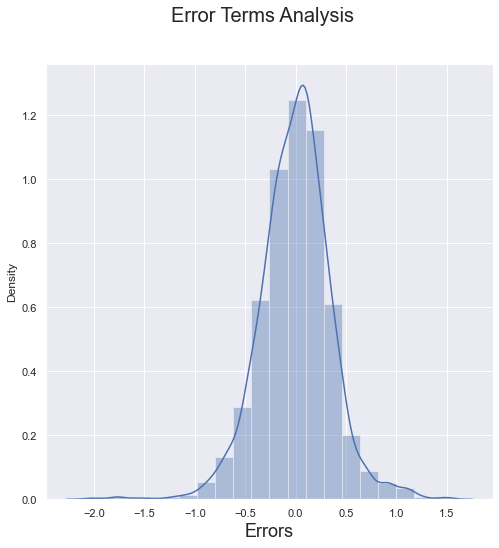

In [93]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [94]:
import warnings
warnings.filterwarnings("ignore")

df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape


(1173, 21)

In [95]:
y_test = df_test.pop('log_price')
X_test = df_test

In [96]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe5c.columns]

In [97]:
y_pred = lm_rfe5.predict(X_test_new)

### Step 11: Model Evaluation

Let's now plot the graph for actual versus predicted values.


Text(0, 0.5, 'y_pred')

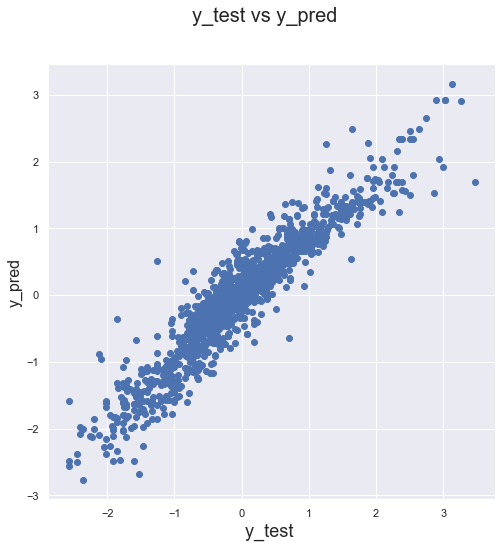

In [104]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

In [105]:
r2_score(y_test, y_pred)

0.8839753105230125

In [106]:
df_auto.to_csv('df_auto.csv', encoding='utf-8')

### Step 12: Conclusion

Our Model explains 88% of the Price Variability. Engine Volume, Registration & Newer models have the most positive impact on price. Among Brands, Renault looses value the fastest followed by Mitsubishi. Among Body Types, Body_Vagon retains the value better. Petrol engine has negative impact on the price
